In [4]:
#Importing all the basic 
import pandas as pd
import numpy as np
import math as m 
import matplotlib.pyplot as plt 
import seaborn as sns


### Credit Risk classification
The data from the credit customers dataset provides a number of feature and the target, if they were granted a credit or not. In this section I will present the data that we have, explaining to what correspond each feature, they're

In [52]:
data = pd.read_csv('credit_customers.csv')

In [6]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


## Data description



1.   Checking Status : Status of an existing checking accoun, categorical feature, with an order
2.   Duration : Duration of the demanded credit
3.   Credit History : History of other credits taken, critical, paid, delays, etc..
4.   Purpose : The resons for the credit demand
5.   Credit Amount : amount of credit in the demand
6.   Employment : Number of years in present employment
7.   Savings Status : The status of the demander's savings account
8.   Instalment commitments : The percentage of the instalment with regard to the demander's disposable income
9.   Personal Status : Marital status (single male, female separated,...). Categorical
10.  Other parties : If the demander has someone backing their credit demand. Categorical
11.  











## Data Exploration

In [8]:
data.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

As we see there are no null values in the dataset so no need for cleaning null values or replacing anything

In [93]:
for i in data.columns:
  print(data[i].describe())
  print(data[i].info())

count    1000.000000
mean        1.121000
std         0.883821
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: checking_status, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: checking_status
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
None
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: duration
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB
None
count              1000
unique                5
top       existing paid
freq                530
Name: credit_history, dtype: object
<class 'pandas.core.series.Series'>
RangeInd

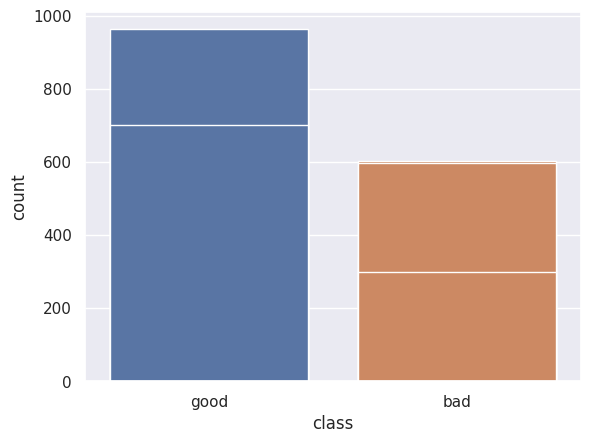

In [10]:
sns.set(style="darkgrid")
for i in data.columns:
  sns.countplot(x = i,data = data)

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_commitment,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
num_dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


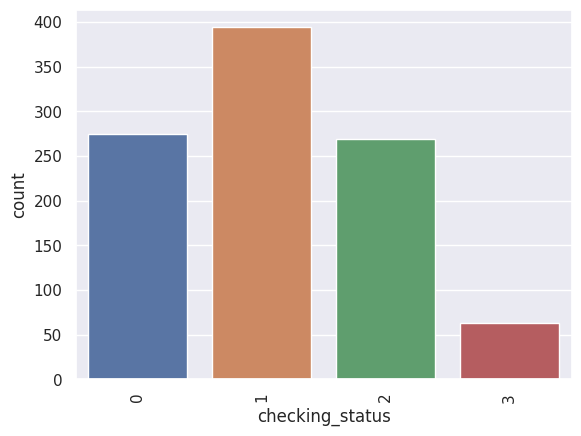

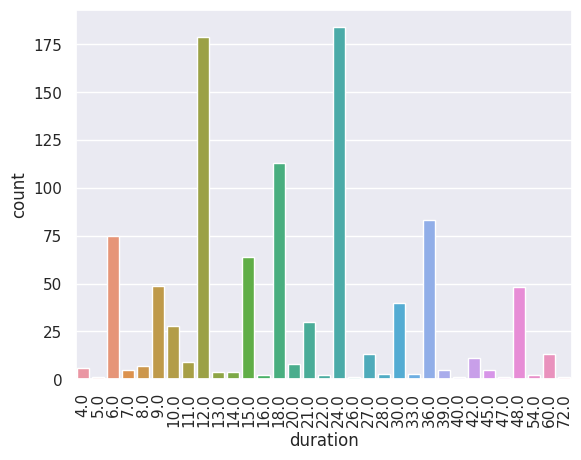

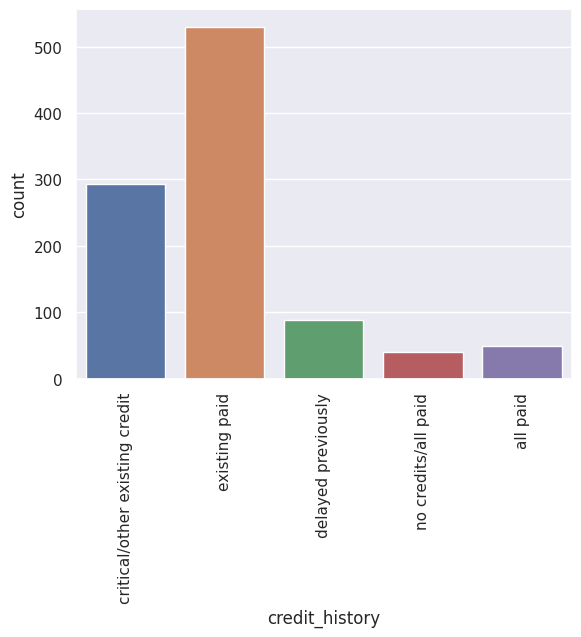

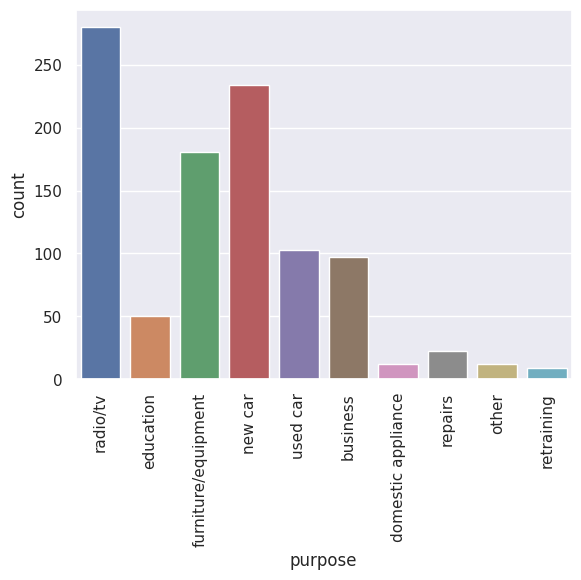

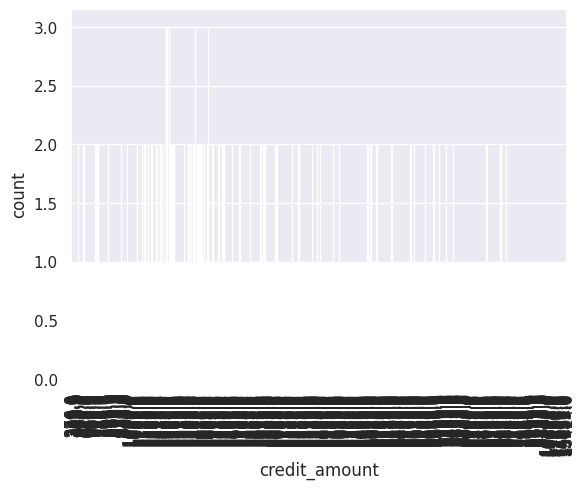

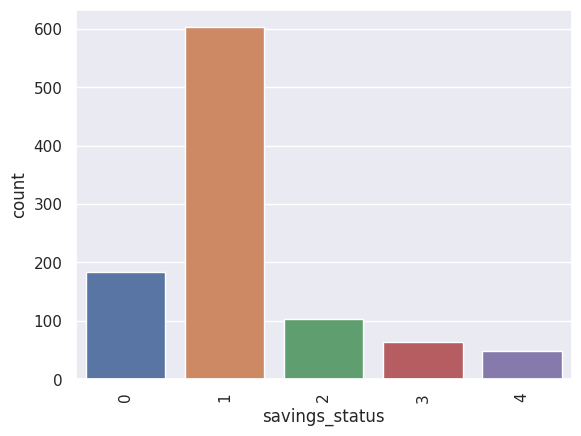

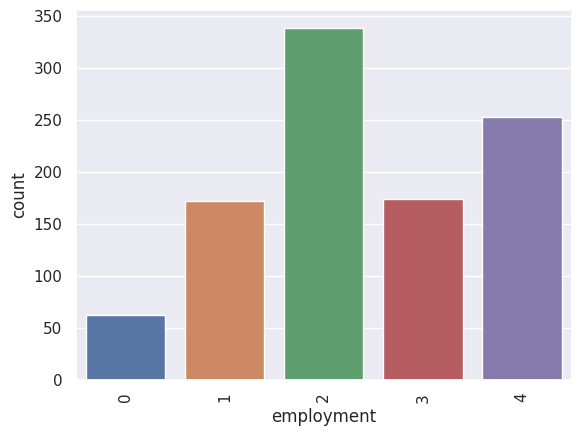

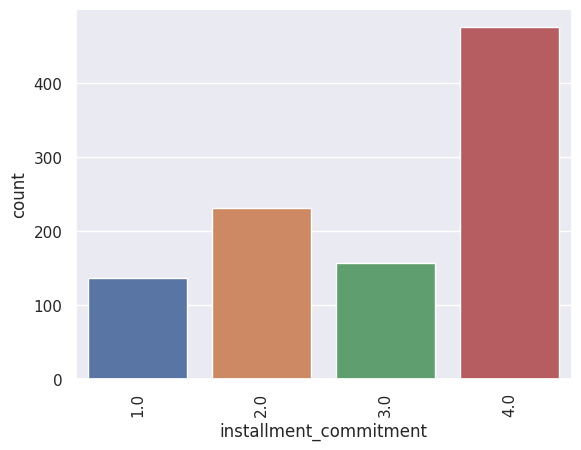

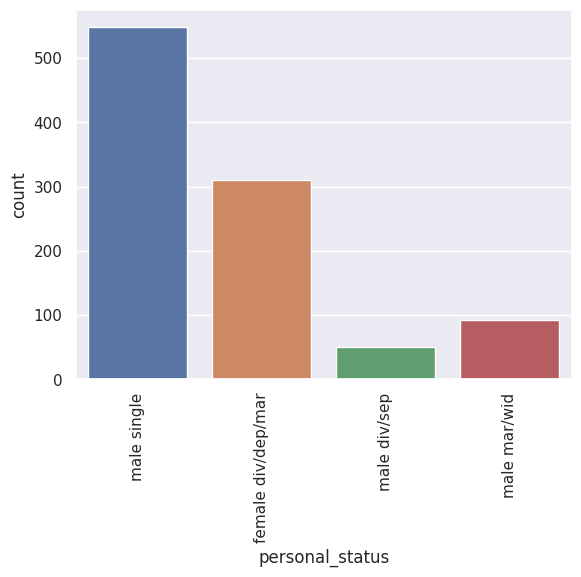

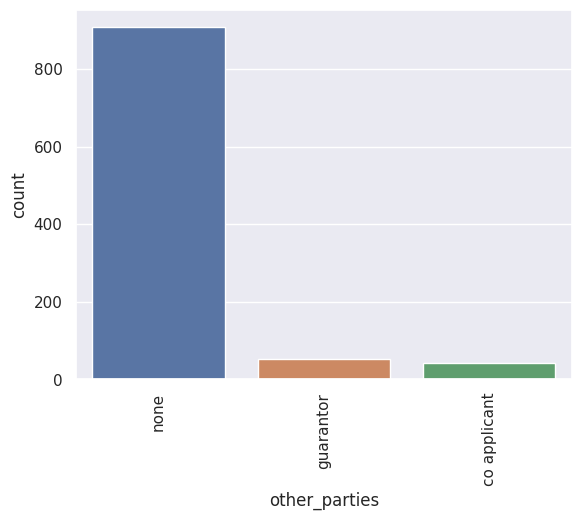

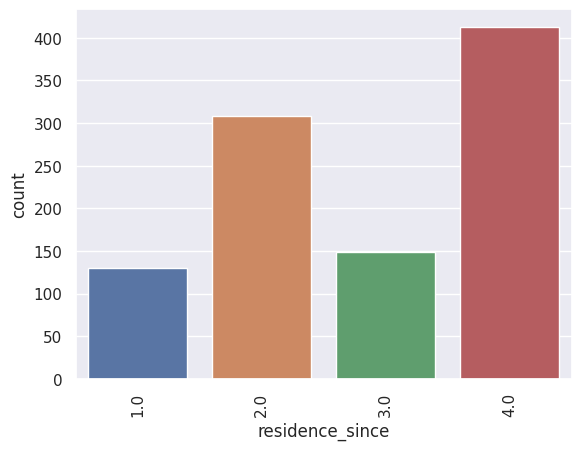

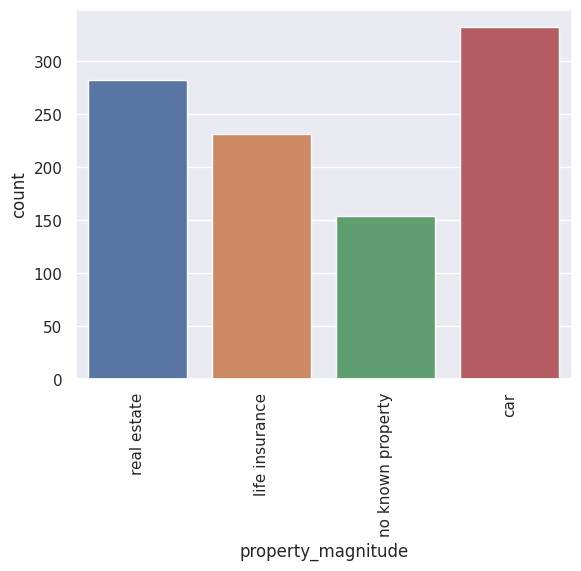

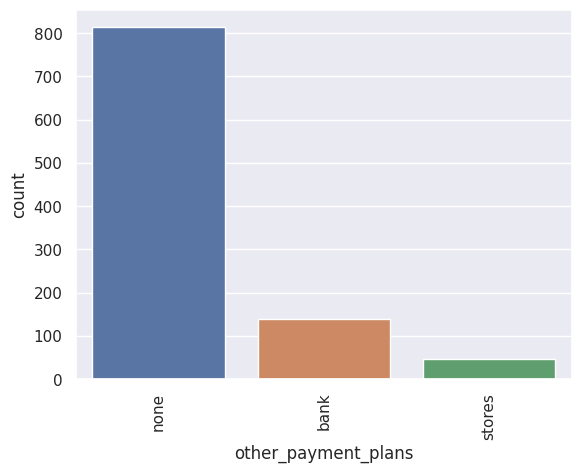

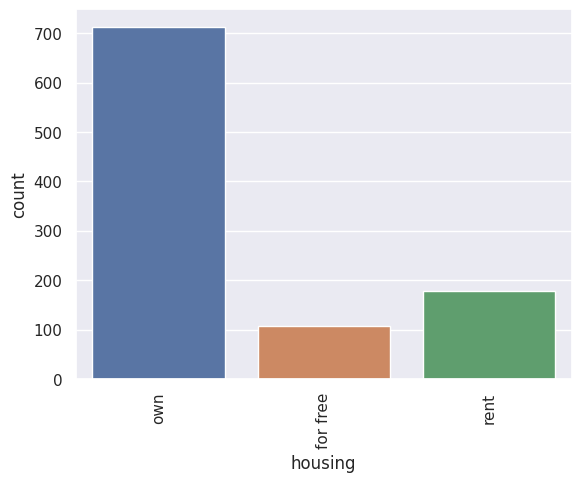

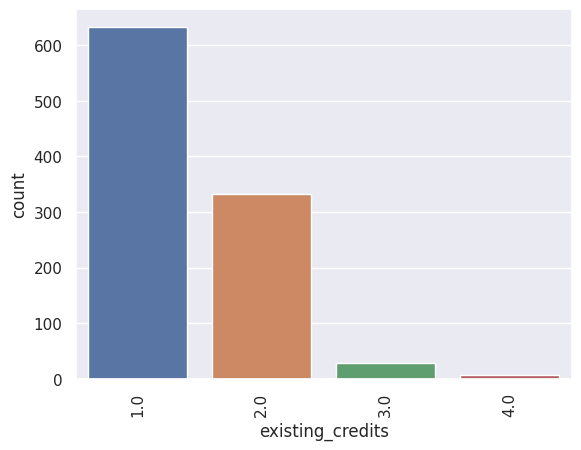

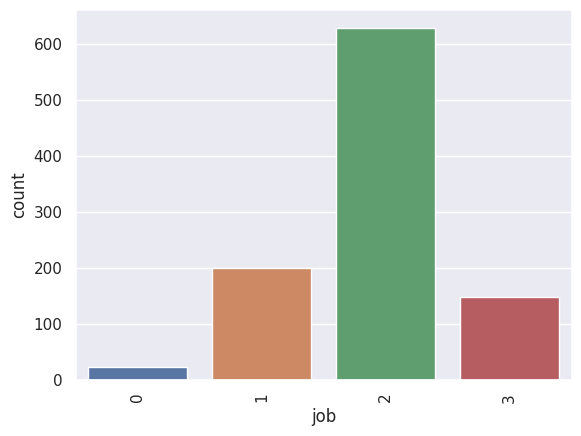

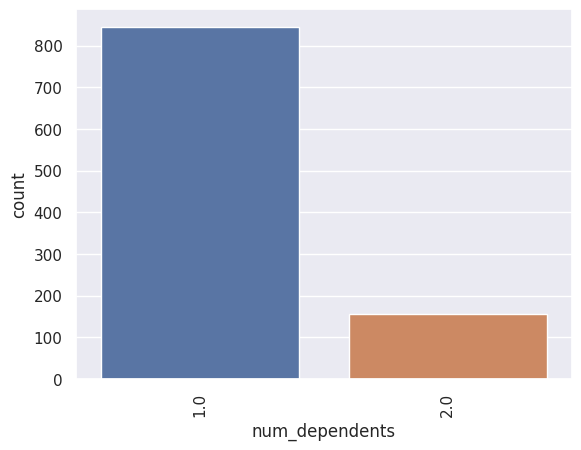

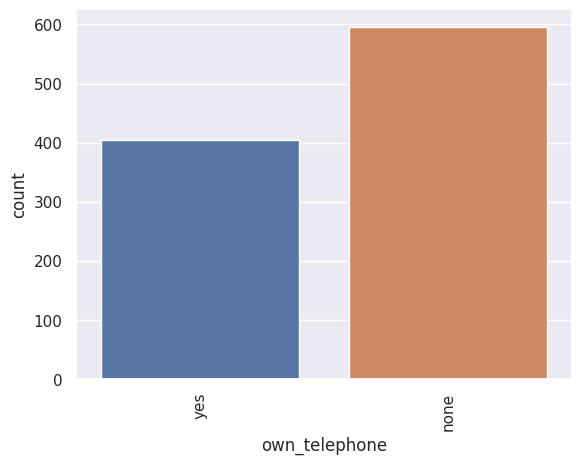

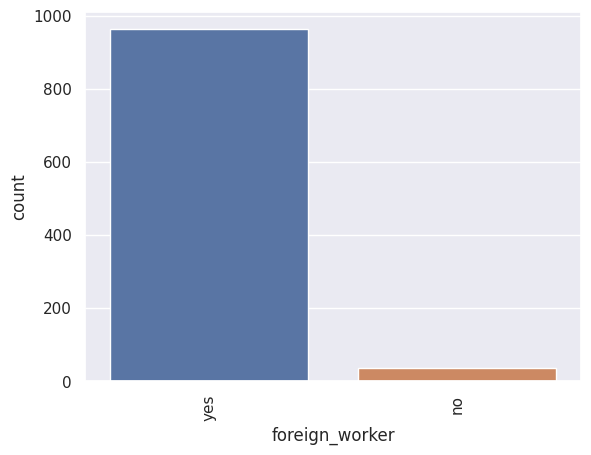

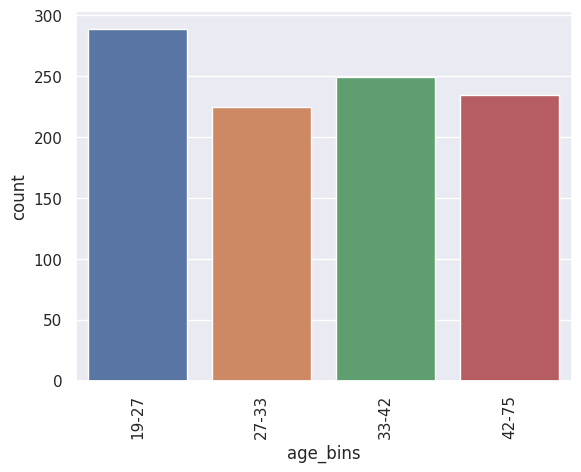

In [79]:
for i in data.columns:
    plt.figure()
    sns.countplot(x = data[i],data = data)
    plt.xticks(rotation=90)

In [22]:
data.age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

In [53]:
bins = [19,27,33,42,75]

data["age_bins"] = pd.cut(data["age"], bins =  [19,27,33,42,75], labels = ['19-27','27-33','33-42','42-75'])
data.drop('age',axis = 1, inplace = True)
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,age_bins
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,none,own,2.0,skilled,1.0,yes,yes,good,42-75
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,none,own,1.0,skilled,1.0,none,yes,bad,19-27
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,none,own,1.0,unskilled resident,2.0,none,yes,good,42-75
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,none,for free,1.0,skilled,2.0,none,yes,good,42-75
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,none,for free,2.0,skilled,2.0,none,yes,bad,42-75


<Axes: xlabel='age_bins', ylabel='count'>

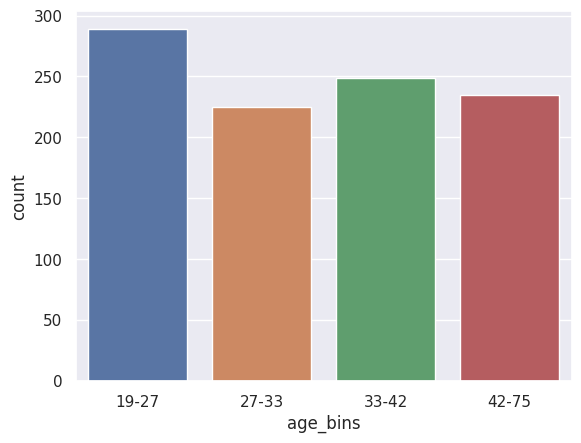

In [25]:
sns.countplot(x = 'age_bins', data= data)

In [34]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'age_bins'],
      dtype='object')

## Preprocessing the Data

In [54]:
data.replace(to_replace = ['<0', 'no checking', '0<=X<200',  '>=200'], value = [0,1,2,3], inplace = True)
data.replace(to_replace = ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'], value  = [0,1,2,3,4], inplace = True)
data.replace(to_replace = ['unemployed','<1', '1<=X<4', '4<=X<7','>=7' ], value  = [0,1,2,3,4], inplace = True)
data.replace(to_replace = [ 'unemp/unskilled non res','unskilled resident','skilled', 'high qualif/self emp/mgmt'], value  = [0,1,2,3], inplace = True)
##Here we're transforming categorical ordinal variables by hand, with a some assumptions such as tha having a negative checking account is worse than having to checking account, among others
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,age_bins
0,0,6.0,critical/other existing credit,radio/tv,1169.0,0,4,4.0,male single,none,...,real estate,none,own,2.0,2,1.0,yes,yes,good,42-75
1,2,48.0,existing paid,radio/tv,5951.0,1,2,2.0,female div/dep/mar,none,...,real estate,none,own,1.0,2,1.0,none,yes,bad,19-27
2,1,12.0,critical/other existing credit,education,2096.0,1,3,2.0,male single,none,...,real estate,none,own,1.0,1,2.0,none,yes,good,42-75
3,0,42.0,existing paid,furniture/equipment,7882.0,1,3,2.0,male single,guarantor,...,life insurance,none,for free,1.0,2,2.0,none,yes,good,42-75
4,0,24.0,delayed previously,new car,4870.0,1,2,3.0,male single,none,...,no known property,none,for free,2.0,2,2.0,none,yes,bad,42-75


In [55]:
target = data['class']
target.head()
data.drop('class', axis = 1, inplace = True)
#separating the features from the target that we will predict

In [56]:
data.dtypes
#checking the data types of the features to understand which ones will need to be encoded and can't be fed directly to the models

checking_status              int64
duration                   float64
credit_history              object
purpose                     object
credit_amount              float64
savings_status               int64
employment                   int64
installment_commitment     float64
personal_status             object
other_parties               object
residence_since            float64
property_magnitude          object
other_payment_plans         object
housing                     object
existing_credits           float64
job                          int64
num_dependents             float64
own_telephone               object
foreign_worker              object
age_bins                  category
dtype: object

In [57]:
list_cat = ['credit_history','purpose','personal_status','other_parties','property_magnitude','other_payment_plans','housing','own_telephone','foreign_worker','age_bins']
cat_var = data[list_cat]
num_var = data.drop(list_cat,axis=1)
num_var.head()
#separating the numerical variables from the categorical variables, as we will One Hot Encode the categorical ones

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,job,num_dependents
0,0,6.0,1169.0,0,4,4.0,4.0,2.0,2,1.0
1,2,48.0,5951.0,1,2,2.0,2.0,1.0,2,1.0
2,1,12.0,2096.0,1,3,2.0,3.0,1.0,1,2.0
3,0,42.0,7882.0,1,3,2.0,4.0,1.0,2,2.0
4,0,24.0,4870.0,1,2,3.0,4.0,2.0,2,2.0


In [58]:
cat_var.head()

,credit_history,purpose,personal_status,other_parties,property_magnitude,other_payment_plans,housing,own_telephone,foreign_worker,age_bins
0,critical/other existing credit,radio/tv,male single,none,real estate,none,own,yes,yes,42-75
1,existing paid,radio/tv,female div/dep/mar,none,real estate,none,own,none,yes,19-27
2,critical/other existing credit,education,male single,none,real estate,none,own,none,yes,42-75
3,existing paid,furniture/equipment,male single,guarantor,life insurance,none,for free,none,yes,42-75
4,delayed previously,new car,male single,none,no known property,none,for free,none,yes,42-75


In [62]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False).fit(cat_var)
encoded = enc.transform(cat_var)
# convert it to a dataframe
encoded_df = pd.DataFrame(
     encoded, 
     columns=enc.get_feature_names_out()
)
encoded_df.index = cat_var.index
encoded_df.head()
#One Hot Encoding of the categorical variables that did not have any special order


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,...,housing_rent,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,age_bins_19-27,age_bins_27-33,age_bins_33-42,age_bins_42-75,age_bins_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [64]:
features = pd.concat([num_var,encoded_df], axis = 1)
features.head()
#Joining back the numerical and categorical variable into a singular dataset

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,job,num_dependents,...,housing_rent,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,age_bins_19-27,age_bins_27-33,age_bins_33-42,age_bins_42-75,age_bins_nan
0,0,6.0,1169.0,0,4,4.0,4.0,2.0,2,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,48.0,5951.0,1,2,2.0,2.0,1.0,2,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,12.0,2096.0,1,3,2.0,3.0,1.0,1,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,42.0,7882.0,1,3,2.0,4.0,1.0,2,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,24.0,4870.0,1,2,3.0,4.0,2.0,2,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Model Training and Validation

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 8)

In [67]:
xtrain.head()

,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,existing_credits,job,num_dependents,...,housing_rent,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,age_bins_19-27,age_bins_27-33,age_bins_33-42,age_bins_42-75,age_bins_nan
319,0,15.0,3643.0,1,4,1.0,4.0,2.0,1,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
194,2,45.0,3031.0,2,2,4.0,4.0,1.0,2,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
441,0,12.0,1620.0,1,2,2.0,3.0,1.0,2,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
623,0,12.0,1858.0,1,1,4.0,1.0,1.0,2,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
529,0,6.0,662.0,1,1,3.0,4.0,1.0,1,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Decision tree classifier

In [68]:
dtc = DecisionTreeClassifier()

params = [{'max_depth': [3, 5, 7, 9],
         'criterion': ['gini', 'entropy']}]
gs_dtc = GridSearchCV(dtc,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dtc.fit(xtrain, ytrain)
print(gs_dtc.best_params_)
# find best model score
print(gs_dtc.score(xtrain, ytrain))



{'criterion': 'gini', 'max_depth': 5}
0.7885714285714286


In [72]:


dtc_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtc_best.fit(xtrain,ytrain)
pred = dtc_best.predict(xtest)
print(accuracy_score(pred,ytest))

0.7266666666666667


In [86]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

         bad       0.37      0.70      0.48        47
        good       0.93      0.77      0.85       253

    accuracy                           0.76       300
   macro avg       0.65      0.74      0.66       300
weighted avg       0.84      0.76      0.79       300



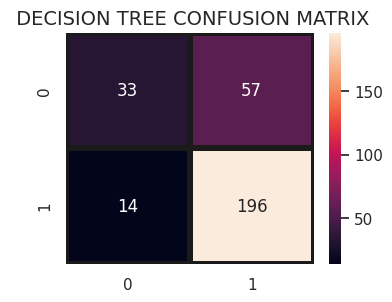

In [100]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

[Text(0.4391025641025641, 0.9166666666666666, 'x[0] <= 0.5\ngini = 0.42\nsamples = 700\nvalue = [210, 490]'),
 Text(0.1858974358974359, 0.75, 'x[1] <= 11.5\ngini = 0.499\nsamples = 192\nvalue = [92, 100]'),
 Text(0.10256410256410256, 0.5833333333333334, 'x[11] <= 0.5\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[34] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.05128205128205128, 0.25, 'x[47] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.02564102564102564, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10256410256410256, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1282051282051282, 0.4166666666666667, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.2692307692307692, 0.5833333333333334, 'x[1] <= 47.5\ngini = 0.497\nsamples = 161\nvalue = [87, 74]'),
 Text(0.205128205

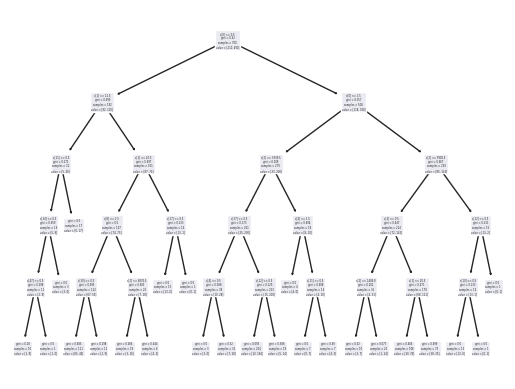

In [92]:
from sklearn import tree
tree.plot_tree(dtc_best)

### Random forest classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rfc = RandomForestClassifier()

params = [{'max_depth': [3, 5, 7, 9,11],
         'criterion': ['gini', 'entropy']
         , 'n_estimators': [50,100,125,130,150,200]}]
gs_rfc = GridSearchCV(rfc,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_rfc.fit(xtrain, ytrain)
print(gs_rfc.best_params_)
# find best model score
print(gs_rfc.score(xtrain, ytrain))

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 130}
0.9714285714285714


In [95]:
rfc_best = RandomForestClassifier(criterion = 'gini', max_depth = 11, n_estimators = 100)
rfc_best.fit(xtrain,ytrain)
pred_rfc = rfc_best.predict(xtest)
print(accuracy_score(pred_rfc,ytest))

0.74


In [87]:
print(classification_report(pred_rfc,ytest))

              precision    recall  f1-score   support

         bad       0.39      0.74      0.51        47
        good       0.94      0.78      0.86       253

    accuracy                           0.78       300
   macro avg       0.67      0.76      0.68       300
weighted avg       0.86      0.78      0.80       300



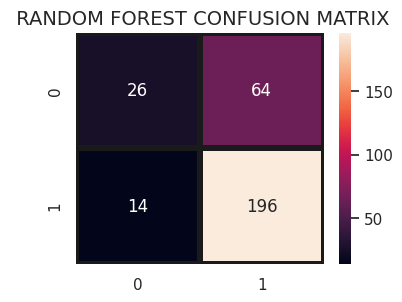

In [101]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, pred_rfc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

### Gradient Boosting Classifier

In [96]:
gbc = GradientBoostingClassifier()

params = [{'learning_rate': [0.1, 0.01, 0.05, 0.15,0.005],
         'criterion': ['friedman_mse', 'squared_error']
         , 'n_estimators': [50,100,125,130,150,200]}]
gs_gbc = GridSearchCV(gbc,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_gbc.fit(xtrain, ytrain)
print(gs_gbc.best_params_)
# find best model score
print(gs_gbc.score(xtrain, ytrain))

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 130}
0.9342857142857143


In [98]:
gbc_best = GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate= 0.1, n_estimators = 130)
gbc_best.fit(xtrain,ytrain)
pred_gbc = gbc_best.predict(xtest)
print(accuracy_score(pred_gbc,ytest))
print(classification_report(pred_gbc,ytest))

0.79
              precision    recall  f1-score   support

         bad       0.51      0.71      0.59        65
        good       0.91      0.81      0.86       235

    accuracy                           0.79       300
   macro avg       0.71      0.76      0.73       300
weighted avg       0.82      0.79      0.80       300



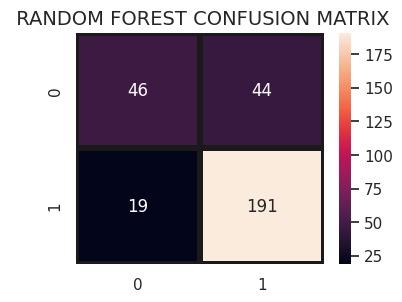

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(ytest, pred_gbc),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GRADIENT BOOSTING CONFUSION MATRIX",fontsize=14)
plt.show()